In [ ]:
!pip install pycaret-ts-alpha

In [ ]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
import plotly.graph_objs as go#visualization
from plotly.offline import iplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True)
import plotly.express as px

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/clean_dataset.csv"
data2= pd.read_csv(path)

In [ ]:
data2.head()

,Continent,Location,Date,Total Cases,New Cases,New cases smoothed,Total deaths,New deaths,new deaths smoothed,total cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
0,Asia,Afghanistan,2020-02-24,5,5,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
1,Asia,Afghanistan,2020-02-25,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
2,Asia,Afghanistan,2020-02-26,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
3,Asia,Afghanistan,2020-02-27,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83
4,Asia,Afghanistan,2020-02-28,5,0,0.0,1,0,0.0,0.126,...,18.6,2.581,1.337,0.2,597.029,9.59,1.9,24.7,0,64.83


In [ ]:
data2.isnull().sum()

Continent                                     0
Location                                      0
Date                                          0
Total Cases                                   0
New Cases                                     0
New cases smoothed                            0
Total deaths                                  0
New deaths                                    0
new deaths smoothed                           0
total cases per million                       0
new cases per million                         0
total deaths per million                      0
reproduction rate                             0
icu patients                                  0
hosp patients                                 0
hosp patients per million                     0
weekly icu admissions                         0
weekly hosp admissions                        0
new tests                                     0
total tests                                   0
new tests per thousand                  

In [ ]:
def create_df(data2, country):
    #Selecting the 7 key columns for country in dataset
    data2=data2[data2['Location']==country].copy()
    data2=data2[['Date','Total Cases','New Cases',
         'Total deaths','New deaths',
         'people vaccinated per hundred', 'people fully vaccinated per hundred',
          'new cases per million']].copy()

    #Convert to datetime
    #data2.date = pd.to_datetime(data2['Date'])
    data2['Date'] = pd.DatetimeIndex(data2['Date'])
    return data2

In [ ]:
data2_india=create_df(data2, 'India')

In [ ]:
data2_india=data2_india.loc[:,['Date','New Cases']]
data2_india=data2_india.set_index('Date')

In [ ]:
data2_india.head()

,New Cases
Date,
2020-01-30,1
2020-01-31,0
2020-02-01,0
2020-02-02,1
2020-02-03,1


In [ ]:
data2_india.tail()

,New Cases
Date,
2022-03-01,7554
2022-03-02,6561
2022-03-03,6396
2022-03-04,5921
2022-03-05,5476


In [ ]:
fig1= px.line(data2_india, template = 'plotly_dark',title='New cases over the time in India')
fig1.show()

In [ ]:
!pip3 install numpy scipy patsy pandas

In [ ]:
!pip install sktime

In [ ]:
from pycaret.time_series import *
setup(data2_india, fh = 7, fold = 3, session_id = 123)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: a94c
INFO:logs:self.variable_keys: {'experiment__', 'n_jobs_param', 'exp_id', 'strictly_positive', 'exogenous_present', '_all_models', 'approach_type', 'y_test_transformed', 'X_test', 'fold_param', '_gpu_n_jobs_param', 'fold_generator', 'enforce_exogenous', 'data', '_all_metrics', 'X_test_transformed', 'X_train_transformed', 'fold_groups_param_full', 'y', '_all_models_internal', 'master_model_container', 'seasonal_period', 'seasonality_present', 'idx', 'USI', 'enforce_pi', 'exp_name_log', 'gpu_param', 'log_plots_param', 'X', 'all_sp_values', 'y_transformed', '_ml_usecase', 'fh', 'memory', 'logging_param', 'X_train', 'y_train', 'display_container', 'index_type', 'html_param', '_available_plots', 'seed', 'primary_sp_to_use', 'pipeline', 'X_transformed', 'y_train_transformed', 'variable_keys

,Description,Value
0,session_id,123
1,Target,New Cases
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(766, 1)"
5,Train data shape,"(759, 1)"
6,Test data shape,"(7, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 0.62s...............


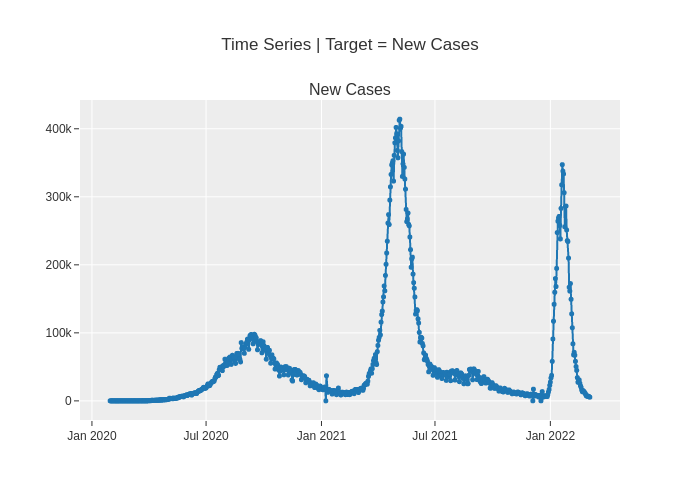

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot = 'ts')

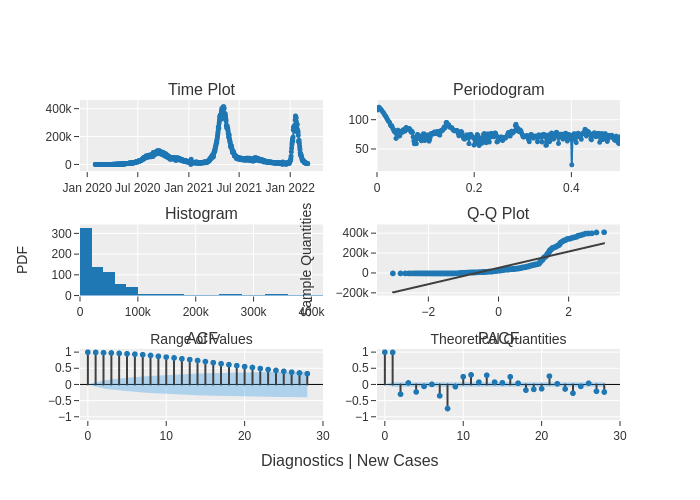

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot='diagnostics')

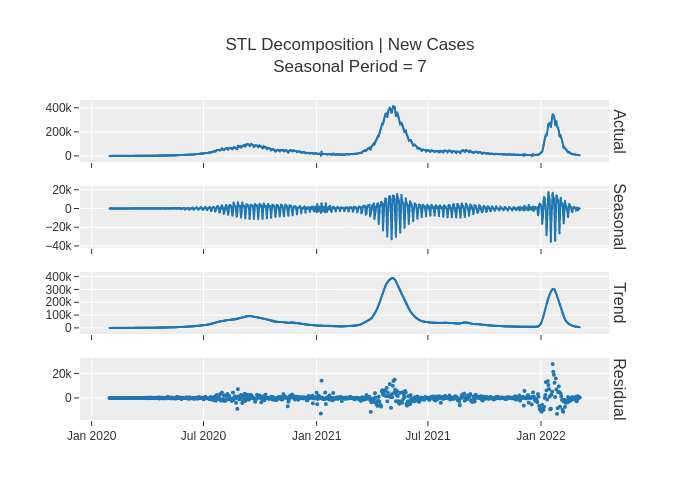

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot = 'decomp_stl')

In [ ]:
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,3441.3603,4072.4908,0.162,0.1462,0.236,0.13,-1.1888,0.1500
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,3441.3603,4072.4908,0.162,0.1462,0.236,0.13,-1.1888,0.1500
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,3483.1459,4126.1261,0.1638,0.1478,0.2388,0.1317,-1.2147,0.1700
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,3529.2759,4189.2002,0.164,0.1485,0.2422,0.1338,-1.2032,0.1500
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,3529.2759,4189.2002,0.164,0.1485,0.2422,0.1338,-1.2032,0.1467
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,3529.2759,4189.2002,0.164,0.1485,0.2422,0.1338,-1.2032,0.1867
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,3483.0089,4307.9768,0.1708,0.1499,0.2373,0.137,-1.4351,0.1467
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,3559.4363,4109.6462,0.1753,0.153,0.242,0.1303,-1.3415,0.1800
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,19800.2063,21498.0777,0.5621,0.4074,1.3832,0.6936,-10.7989,0.2833
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,22065.1957,23723.7313,0.6584,0.463,1.5358,0.7636,-14.74,0.1533


INFO:logs:master_model_container: 27
INFO:logs:display_container: 2
INFO:logs:BaseCdsDtForecaster(regressor=ElasticNet(random_state=123), sp=7,
                    window_length=7)
INFO:logs:compare_models() successfully completed......................................


In [ ]:
best = compare_models(sort = 'MAE')

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,3441.3603,4072.4908,0.162,0.1462,0.236,0.13,-1.1888,0.1533
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,3441.3603,4072.4908,0.162,0.1462,0.236,0.13,-1.1888,0.1500
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,3483.0089,4307.9768,0.1708,0.1499,0.2373,0.137,-1.4351,0.1533
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,3483.1459,4126.1261,0.1638,0.1478,0.2388,0.1317,-1.2147,0.1433
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,3529.2759,4189.2002,0.164,0.1485,0.2422,0.1338,-1.2032,0.1433
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,3529.2759,4189.2002,0.164,0.1485,0.2422,0.1338,-1.2032,0.1500
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,3529.2759,4189.2002,0.164,0.1485,0.2422,0.1338,-1.2032,0.1600
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,3559.4363,4109.6462,0.1753,0.153,0.242,0.1303,-1.3415,0.1800
auto_arima,Auto ARIMA,13655.8391,15054.6663,0.4336,0.6151,0.9476,0.4842,-5.7918,74.4667
arima,ARIMA,19229.1304,20901.2766,0.6776,1.052,1.3259,0.6693,-16.7363,0.1467


INFO:logs:master_model_container: 54
INFO:logs:display_container: 3
INFO:logs:BaseCdsDtForecaster(regressor=ElasticNet(random_state=123), sp=7,
                    window_length=7)
INFO:logs:compare_models() successfully completed......................................


In [ ]:
prophet=create_model('prophet')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2022-02-24,645673.4467,649299.4087,0.0150,0.0149,1.6144,0.9281,-7525.5885
1,2022-02-27,529654.3064,533294.7598,0.0123,0.0123,1.3284,0.7638,-8549.8293
Mean,NaT,587663.8765,591297.0843,0.0137,0.0136,1.4714,0.8460,-8037.7089
SD,NaT,58009.5702,58002.3244,0.0014,0.0013,0.1430,0.0822,512.1204


INFO:logs:master_model_container: 29
INFO:logs:display_container: 7
INFO:logs:ProphetPeriodPatched()
INFO:logs:create_model() successfully completed......................................


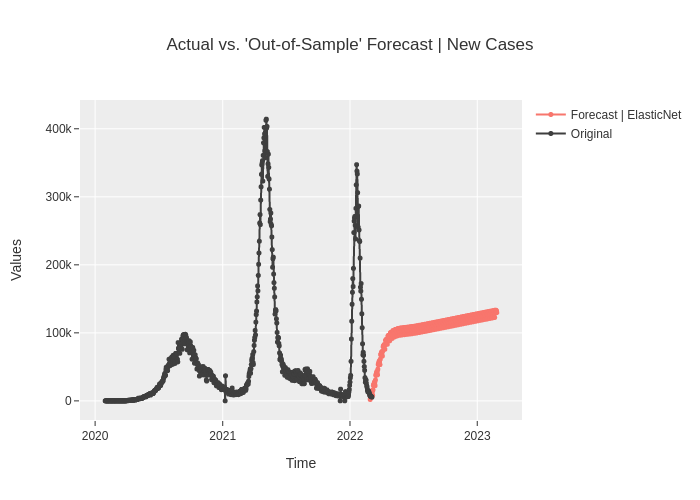

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 365})

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2022-02-05,27415.1915,31529.2069,0.4967,0.7405,1.9457,1.0296,-5.6014
1,2022-02-12,21489.3254,22170.0368,0.8464,1.3071,1.4480,0.6961,-21.8865
2,2022-02-19,8782.8742,9004.5860,0.6897,1.1084,0.5840,0.2823,-22.7209
Mean,NaT,19229.1304,20901.2766,0.6776,1.0520,1.3259,0.6693,-16.7363
SD,NaT,7772.6947,9239.2984,0.1430,0.2347,0.5626,0.3057,7.8809


INFO:logs:master_model_container: 55
INFO:logs:display_container: 5
INFO:logs:ARIMA(seasonal_order=(0, 1, 0, 7))
INFO:logs:create_model() successfully completed......................................


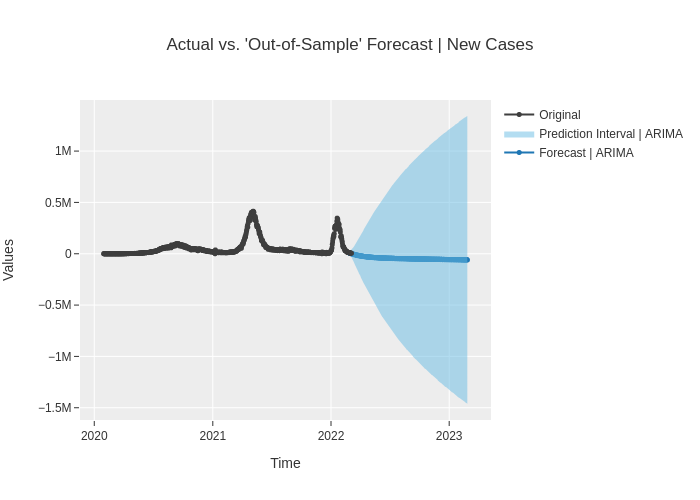

INFO:logs:Visual Rendered Successfully


In [ ]:
arima=create_model('arima')
plot_model(arima, plot = 'forecast', data_kwargs = {'fh' : 365})

In [ ]:
# finalize model
final_best = finalize_model(best)
# generate predictions
predict_model(final_best, fh = 365)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fc92140f460>, estimator=BaseCdsDtForecaster(regressor=ElasticNet(random_state=123), sp=7,
                    window_length=7), fit_kwargs=None, groups=None, model_only=True, experiment_custom_tags=None, display=None)
INFO:logs:Finalizing BaseCdsDtForecaster(regressor=ElasticNet(random_state=123), sp=7,
                    window_length=7)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fc92140f460>, estimator=BaseCdsDtForecaster(regressor=ElasticNet(random_state=123), sp=7,
                    window_length=7), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, kwargs={})

,y_pred
2022-03-06,4611.4774
2022-03-07,-1903.7128
2022-03-08,3563.6489
2022-03-09,9319.2706
2022-03-10,10352.6631
...,...
2023-03-01,128759.5518
2023-03-02,128374.8277
2023-03-03,127916.2131
2023-03-04,127862.5945


In [ ]:
# save the model
save_model(final_best, 'my_best_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=BaseCdsDtForecaster(regressor=HuberRegressor(), sp=7, window_length=7), model_name=my_best_model, prep_pipe_=None, verbose=True, use_case=MLUsecase.TIME_SERIES, kwargs={})
INFO:logs:Adding model into prep_pipe
INFO:logs:my_best_model.pkl saved in current working directory
INFO:logs:BaseCdsDtForecaster(regressor=HuberRegressor(), sp=7, window_length=7)
INFO:logs:save_model() successfully completed......................................


Transformation Pipeline and Model Successfully Saved


(BaseCdsDtForecaster(regressor=HuberRegressor(), sp=7, window_length=7),
 'my_best_model.pkl')